<a href="https://colab.research.google.com/github/EJ-Ellie-John/NEDpython/blob/main/EJ_BatchX_MidtermExam_10Aug25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving Student Depression Dataset.csv to Student Depression Dataset (1).csv


In [134]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Step 1: Dataset Loading and Understanding
1. Load the dataset into a Pandas DataFrame.

o Verify the dataset's structure using .info() and .head().

o Identify the target variable (e.g., depression levels).

o Check for missing values.

o Summary of Numeric and descriptive columns

In [93]:
#Q1 Dataset Loading and Understanding
#Load the dataset into a Pandas DataFrame.

df = pd.read_csv('Student Depression Dataset.csv')
#Verify the dataset's structure using .info() and .head().
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27896 non-null  object 
 2   Age                                    27893 non-null  float64
 3   City                                   27900 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27896 non-null  object 
 11  Di

In [95]:
# Identify the target variable (e.g., depression levels).
# count of depression column
df['Depression'].value_counts()

,count
Depression,
1,16336
0,11565


In [96]:
# Check for missing values.
df.isnull().sum()

,0
id,0
Gender,5
Age,8
City,1
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [97]:
#Summary of Numeric and Descriptive columns
#first the summary of numerics
df.describe(include = 'number')

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27893.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27898.000000,27901.000000
mean,70442.149421,25.822500,3.141214,0.000430,7.656104,2.943837,0.000681,7.157036,3.139867,0.585499
std,40641.175216,4.905979,1.381465,0.043992,1.470707,1.361148,0.044394,3.707748,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [98]:
# second the summary of textuals

df.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27896,27900,27901,27896,27901,27897,27901,27897
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15543,1570,27870,8306,10317,6078,17656,14397


# Step 2: Data Preprocessing
2. Handle missing or null values in the dataset:

o Replace them with mean/median/mode or drop the rows/columns as appropriate.
3. Encode categorical features (if any) using techniques like encoding.
4. Normalize or standardize the numerical features.

In [109]:
df.isnull().sum()

# fillna for object
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Degree'].fillna(df['Degree'].mode()[0], inplace=True)

#fillna for float/string
df['Work/Study hours'].fillna(df['Work/Study hours'].mode()[0], inplace=True)
df['Family history of depression'].fillna(df['Family history of depression'].mode()[0], inplace=True)

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [111]:
# Labelencoder for Sleep Duration, Work/Study Hours, Financial Stress, Family History of Mental Illness
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sleep Duration'] = labelencoder.fit_transform(df['Sleep Duration'])
#df['Work/Study hours'] = labelencoder.fit_transform(df['Work/Study hours'])
df['Financial Stress'] = labelencoder.fit_transform(df['Financial Stress'])
df['Family History of Mental Illness'] = labelencoder.fit_transform(df['Family History of Mental Illness'])

# probably the outcome is just 0 1 2 and thats not what the requirement was

df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,0,Healthy,B.Pharm,Yes,3.0,0,0,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,0,Moderate,BSc,No,3.0,1,1,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,2,Healthy,BA,No,9.0,0,1,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,1,Moderate,BCA,Yes,4.0,4,1,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,0,Moderate,M.Tech,Yes,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5,0,5.75,5,0,0,Unhealthy,Class 12,Yes,7.0,0,1,0
27897,140686,Male,27.0,Ludhiana,Student,2,0,9.40,3,0,2,Healthy,MSc,No,0.0,2,1,0
27898,140689,Male,31.0,Faridabad,Student,3,0,6.61,4,0,0,Unhealthy,MD,No,12.0,1,0,0
27899,140690,Female,18.0,Ludhiana,Student,5,0,6.88,2,0,2,Healthy,Class 12,Yes,10.0,4,0,1


In [55]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [112]:
# Normalize the numerical features of the dataframe
df.info()
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
df[['Academic Pressure', 'Work Pressure', 'Study Satisfaction','Job Satisfaction', 'Sleep Duration']] = MMscaler.fit_transform(df[['Academic Pressure', 'Work Pressure', 'Study Satisfaction','Job Satisfaction', 'Sleep Duration']])

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,1.0,0.0,8.97,0.4,0.0,0.0,Healthy,B.Pharm,Yes,3.0,0,0,1
1,8,Female,24.0,Bangalore,Student,0.4,0.0,5.90,1.0,0.0,0.0,Moderate,BSc,No,3.0,1,1,0
2,26,Male,31.0,Srinagar,Student,0.6,0.0,7.03,1.0,0.0,0.4,Healthy,BA,No,9.0,0,1,0
3,30,Female,28.0,Varanasi,Student,0.6,0.0,5.59,0.4,0.0,0.2,Moderate,BCA,Yes,4.0,4,1,1
4,32,Female,25.0,Jaipur,Student,0.8,0.0,8.13,0.6,0.0,0.0,Moderate,M.Tech,Yes,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,1.0,0.0,5.75,1.0,0.0,0.0,Unhealthy,Class 12,Yes,7.0,0,1,0
27897,140686,Male,27.0,Ludhiana,Student,0.4,0.0,9.40,0.6,0.0,0.4,Healthy,MSc,No,0.0,2,1,0
27898,140689,Male,31.0,Faridabad,Student,0.6,0.0,6.61,0.8,0.0,0.0,Unhealthy,MD,No,12.0,1,0,0
27899,140690,Female,18.0,Ludhiana,Student,1.0,0.0,6.88,0.4,0.0,0.4,Healthy,Class 12,Yes,10.0,4,0,1


# Step 3: Exploratory Data Analysis (EDA)
5. Perform basic EDA to understand the data:

o Plot the distribution of the target variable.

o Create visualizations (e.g., histograms, boxplots) to analyze feature relationships.

o Calculate correlations between features.

6. Identify key patterns or trends in the dataset that may help in prediction.

<Axes: xlabel='Gender', ylabel='count'>

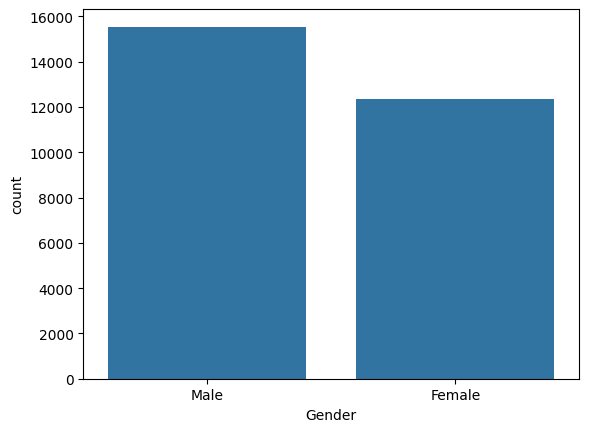

In [113]:
#plot the distribution of X = Gender and Y = Academic Pressure
sns.countplot(x='Gender', data=df)


<Axes: xlabel='Age', ylabel='Depression'>

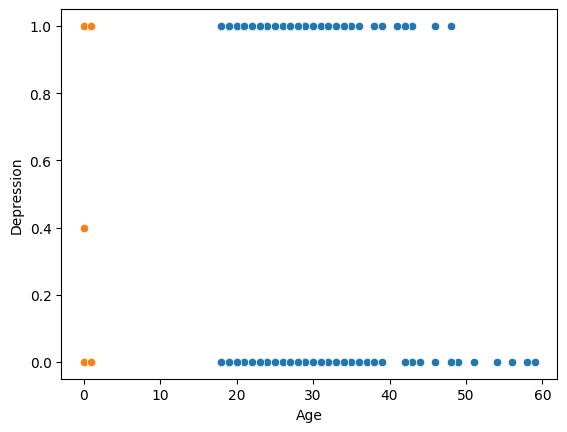

In [114]:
# additional step just for own view (not to be included in Midterm)
#scatterplot for depression with work pressure and age
sns.scatterplot(x='Age', y='Depression', data=df)
sns.scatterplot(x='Depression', y='Work Pressure', data=df)

<Axes: xlabel='Depression', ylabel='count'>

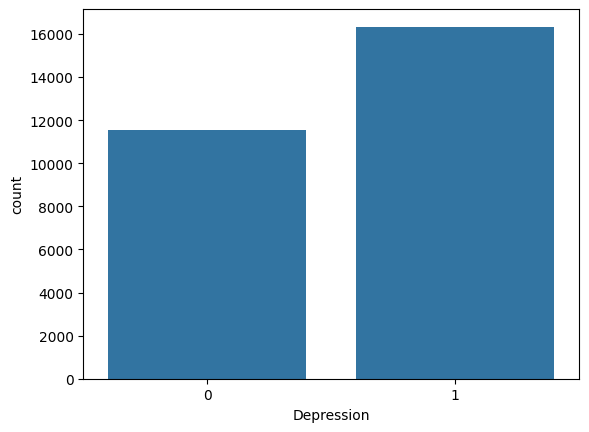

In [115]:
# Plot the depression level
## with profession
#sns.countplot(x='Profession', data=df)
sns.countplot(x='Depression', data=df)



<Axes: xlabel='Depression', ylabel='Count'>

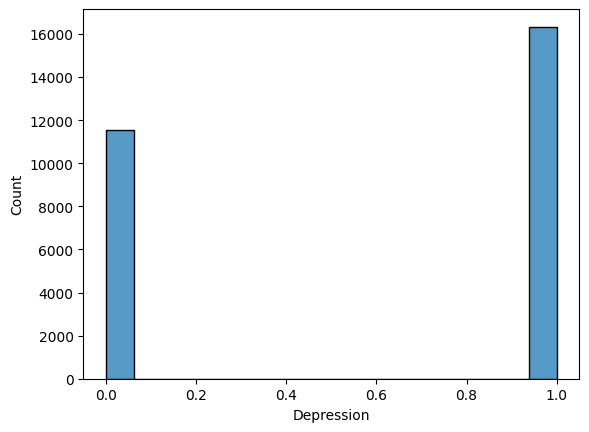

In [116]:
# Plot depression level as Histogram
sns.histplot(x='Depression', data=df)

<Axes: xlabel='Depression', ylabel='Academic Pressure'>

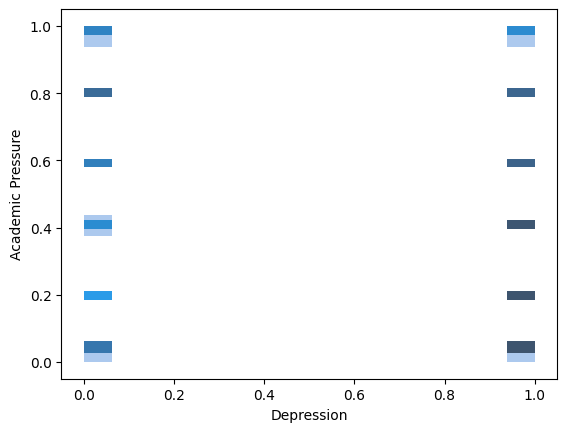

In [117]:
#plot multiple features of dataframe  in histogram to show relationship
sns.histplot(x='Depression', y='Academic Pressure', data=df)
sns.histplot(x='Depression', y='Work Pressure', data=df)
sns.histplot(x='Depression', y='Study Satisfaction', data=df)

<Axes: xlabel='Depression', ylabel='Academic Pressure'>

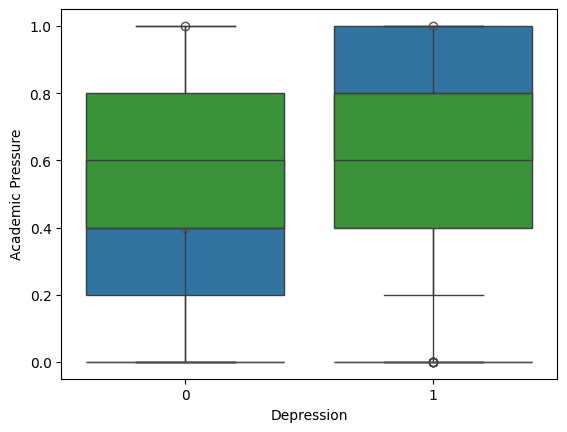

In [118]:
#plot multiple features of dataframe  in box plot to show relationship
sns.boxplot(x='Depression', y='Academic Pressure', data=df)
sns.boxplot(x='Depression', y='Work Pressure', data=df)
sns.boxplot(x='Depression', y='Study Satisfaction', data=df)

In [119]:
# Calculate correlation between Age and Job Satisfaction
correlation_age_and_jobsatisfaction = df['Age'].corr(df['Job Satisfaction'])
print(f"Correlation between Age and Job Satisfaction: {correlation_age_and_jobsatisfaction}")

# correlation between age and depression
correlation_age_and_depression = df['Age'].corr(df['Depression'])
print(f"Correlation between Age and Depression: {correlation_age_and_depression}")

#corr_age_and_dietaryhabits = df['Age'].corr(df['Dietary Habits'])
#print(f"Correlation between Age and Dietary Habits: {corr_age_and_dietaryhabits}")


Correlation between Age and Job Satisfaction: -0.0004308191698308127
Correlation between Age and Depression: -0.22641774814602697


In [120]:
# prediction in the dataframe






# Step 4: Model Building and Training
7. Split the dataset into training (70%) and testing (30%) subsets.
8. Train a classification model on the training set.

In [145]:
# train test split the dataframe

from sklearn.model_selection import train_test_split
X = df.drop(['Gender'], axis=1)
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X-train, X-test, y-train, y-test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train
X_test
y_train
y_test

,Gender
19981,Female
16551,Male
7640,Male
21266,Male
15759,Male
...,...
18596,Female
10606,Female
21263,Male
8778,Male


In [144]:
# perform Min Max scaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.transform(X_test)

df

ValueError: could not convert string to float: 'Male'

In [147]:
# train a classification model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


ValueError: could not convert string to float: 'Srinagar'

# Step 5: Model Evaluation
9. Evaluate the model on the testing set using:

o Accuracy

o Confusion Matrix

o Precision, Recall, and F1-score

o Classification Report

In [149]:
# evaluate model of sk metrics accuracy, confusion matrix, precision, recall, f1 score and classification report

accuracy_score = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

NameError: name 'y_pred' is not defined